In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr

In [13]:
def clean_and_prepare_data(filename):
    # Read the data into a DataFrame
    data = pd.read_excel(filename)

    # Handle Missing Values
    data.dropna(inplace=True)

    # Remove Duplicates
    data.drop_duplicates(inplace=True)
    # Convert non-numeric values (e.g., "..") to NaN
    data.replace("..", pd.NA, inplace=True)


    # Rename columns for easier reference
    data_cleaned = data.rename(columns={'2020 [YR2020]': '2020', '2015 [YR2015]': '2015', '2010 [YR2010]': '2010'})

    # Convert columns to appropriate data types
    data_cleaned['2020'] = pd.to_numeric(data_cleaned['2020'], errors='coerce')
    data_cleaned['2015'] = pd.to_numeric(data_cleaned['2015'], errors='coerce')
    data_cleaned['2010'] = pd.to_numeric(data_cleaned['2010'], errors='coerce')
     # Convert non-numeric values to NaN
    for col in data.columns[4:]:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    return data_cleaned

In [14]:
filename = 'Extract.xlsx'
data_cleaned = clean_and_prepare_data(filename)
print(data_cleaned)


      Country Name Country Code  \
0      Afghanistan          AFG   
1      Afghanistan          AFG   
2      Afghanistan          AFG   
3      Afghanistan          AFG   
4        Australia          AUS   
..             ...          ...   
75   United States          USA   
76  United Kingdom          GBR   
77  United Kingdom          GBR   
78  United Kingdom          GBR   
79  United Kingdom          GBR   

                                          Series Name           Series Code  \
0             Access to electricity (% of population)        EG.ELC.ACCS.ZS   
1   Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
2   Renewable energy consumption (% of total final...        EG.FEC.RNEW.ZS   
3   Renewable electricity output (% of total elect...        EG.ELC.RNEW.ZS   
4             Access to electricity (% of population)        EG.ELC.ACCS.ZS   
..                                                ...                   ...   
75  Renewable electricity 

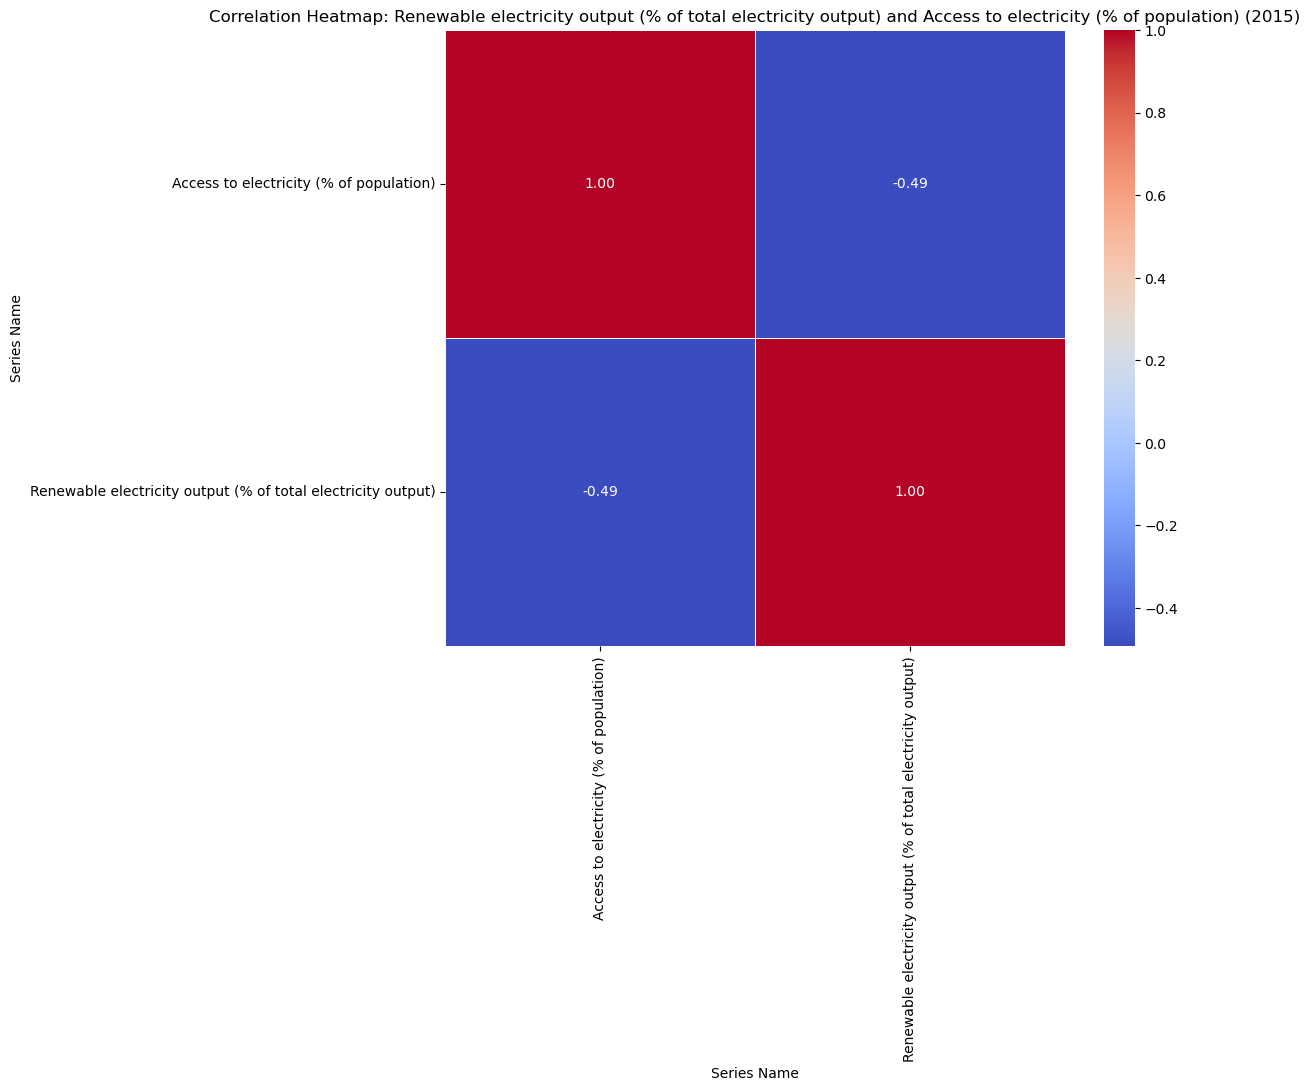

In [22]:
# Filter rows based on the specified Series Names
selected_series = [
    'Renewable electricity output (% of total electricity output)',
    'Access to electricity (% of population)'
]

analysis_data = analysis_data[analysis_data['Series Name'].isin(selected_series)]

# Pivot the DataFrame to have Series Names as columns
analysis_data_pivot = analysis_data.pivot(index='Country Name', columns='Series Name', values='2015')

# Drop rows with missing values
analysis_data_pivot.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = analysis_data_pivot.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title(f'Correlation Heatmap: {selected_series[0]} and {selected_series[1]} (2015)')

# Show the plot
plt.show()




In [15]:
# Plotting
def plot_data(df, series_code, ylabel, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country Name', y='2010', data=df, label='2010')
    sns.barplot(x='Country Name', y='2015', data=df, label='2015')
    sns.barplot(x='Country Name', y='2020', data=df, label='2020')
    plt.title(title)
    plt.xlabel('Country Name')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [16]:
# Filter data for specific series codes
electricity_access = data_cleaned[data_cleaned['Series Code'] == 'EG.ELC.ACCS.ZS']
methane_emissions = data_cleaned[data_cleaned['Series Code'] == 'EN.ATM.METH.AG.KT.CE']
renewable_energy_consumption = data_cleaned[data_cleaned['Series Code'] == 'EG.FEC.RNEW.ZS']


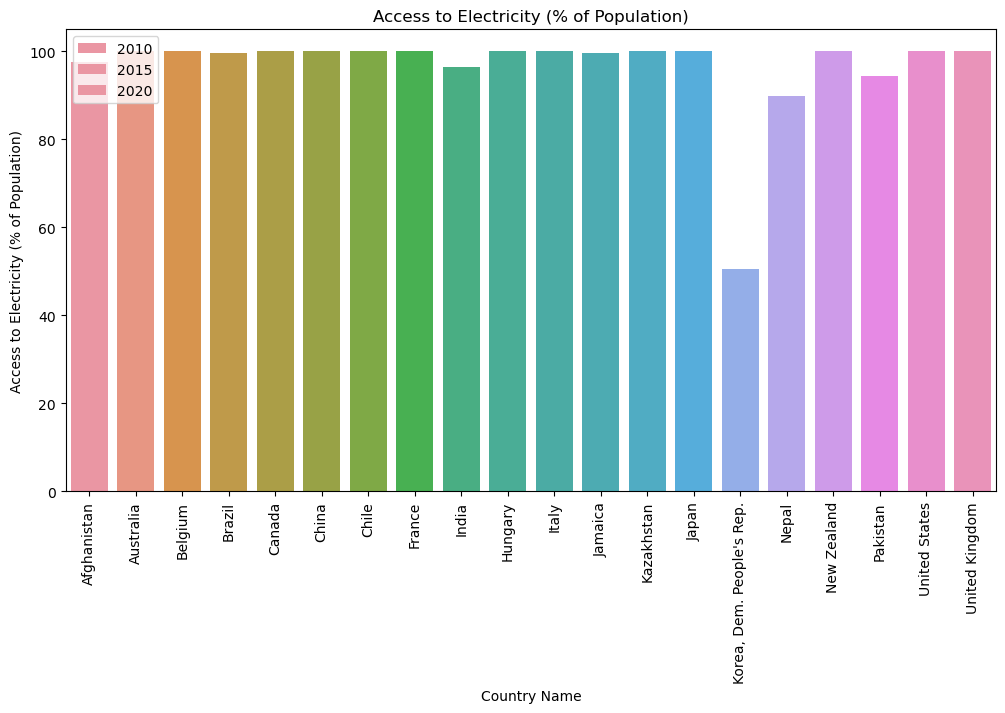

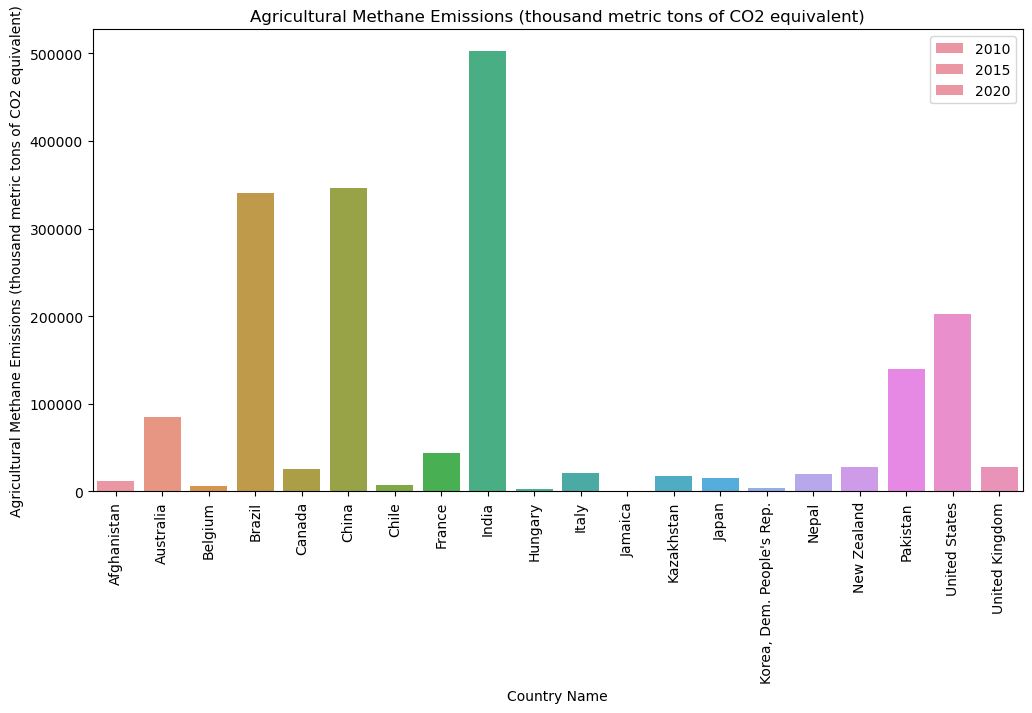

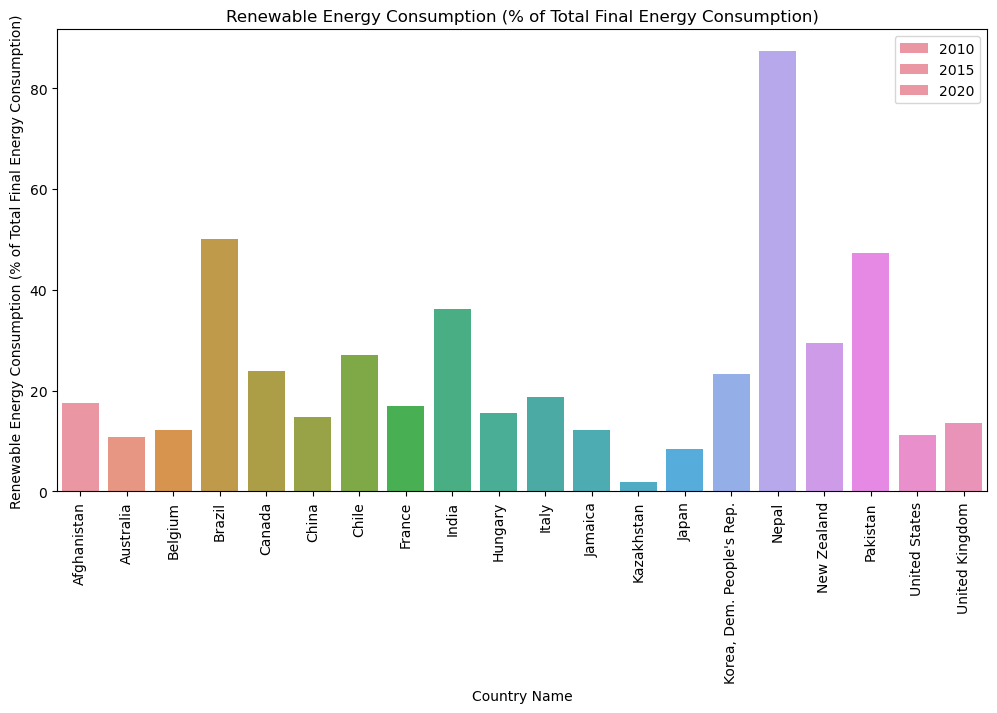

In [17]:
# Plotting
plot_data(electricity_access, 'EG.ELC.ACCS.ZS', 'Access to Electricity (% of Population)', 'Access to Electricity (% of Population)')
plot_data(methane_emissions, 'EN.ATM.METH.AG.KT.CE', 'Agricultural Methane Emissions (thousand metric tons of CO2 equivalent)', 'Agricultural Methane Emissions (thousand metric tons of CO2 equivalent)')
plot_data(renewable_energy_consumption, 'EG.FEC.RNEW.ZS', 'Renewable Energy Consumption (% of Total Final Energy Consumption)', 'Renewable Energy Consumption (% of Total Final Energy Consumption)')

In [18]:
# Calculate summary statistics using .describe() and NumPy
summary_stats = data_cleaned[['2010', '2015', '2020']].describe()

In [22]:
# Examine correlations between indicators using pandas .corr()
correlation_matrix = data_cleaned[['2010', '2015', '2020']].corr()

KeyError: "['Renewable electricity output (% of total electricity output)', 'Access to electricity (% of population)'] not in index"

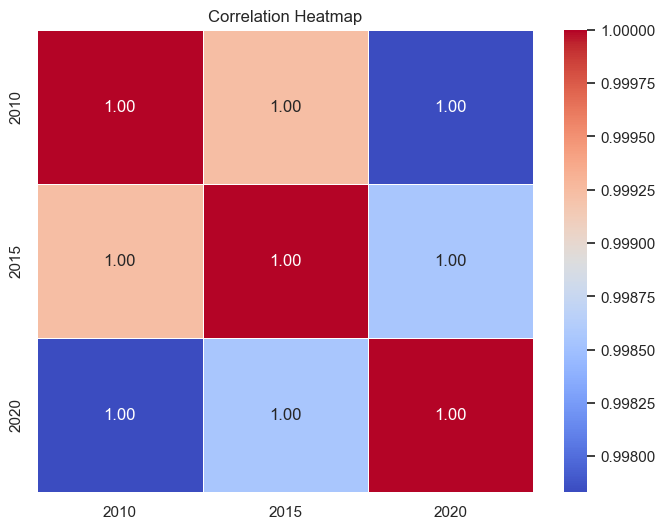

In [23]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Reshape data to have a single 'Year' column
data_cleaned_melted = pd.melt(data_cleaned, id_vars=[ 'Country Name','Country Code', 'Series Name', 'Series Code'], 
                              var_name='Year', value_name='Value')

# Convert 'Year' to numeric
data_cleaned_melted['Year'] = pd.to_numeric(data_cleaned_melted['Year'].str.extract('(\d+)', expand=False))

# Calculate summary statistics using .describe() and NumPy
summary_stats = data_cleaned_melted.groupby('Year')['Value'].describe()


Methane Data:
        Country Name Country Code  \
1        Afghanistan          AFG   
5          Australia          AUS   
9            Belgium          BEL   
13            Brazil          BRA   
17            Canada          CAN   
...              ...          ...   
1981           Nepal          NPL   
1985     New Zealand          NZL   
1989        Pakistan          PAK   
1993   United States          USA   
1997  United Kingdom          GBR   

                                            Series Name           Series Code  \
1     Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
5     Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
9     Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
13    Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
17    Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
...                                                 ...

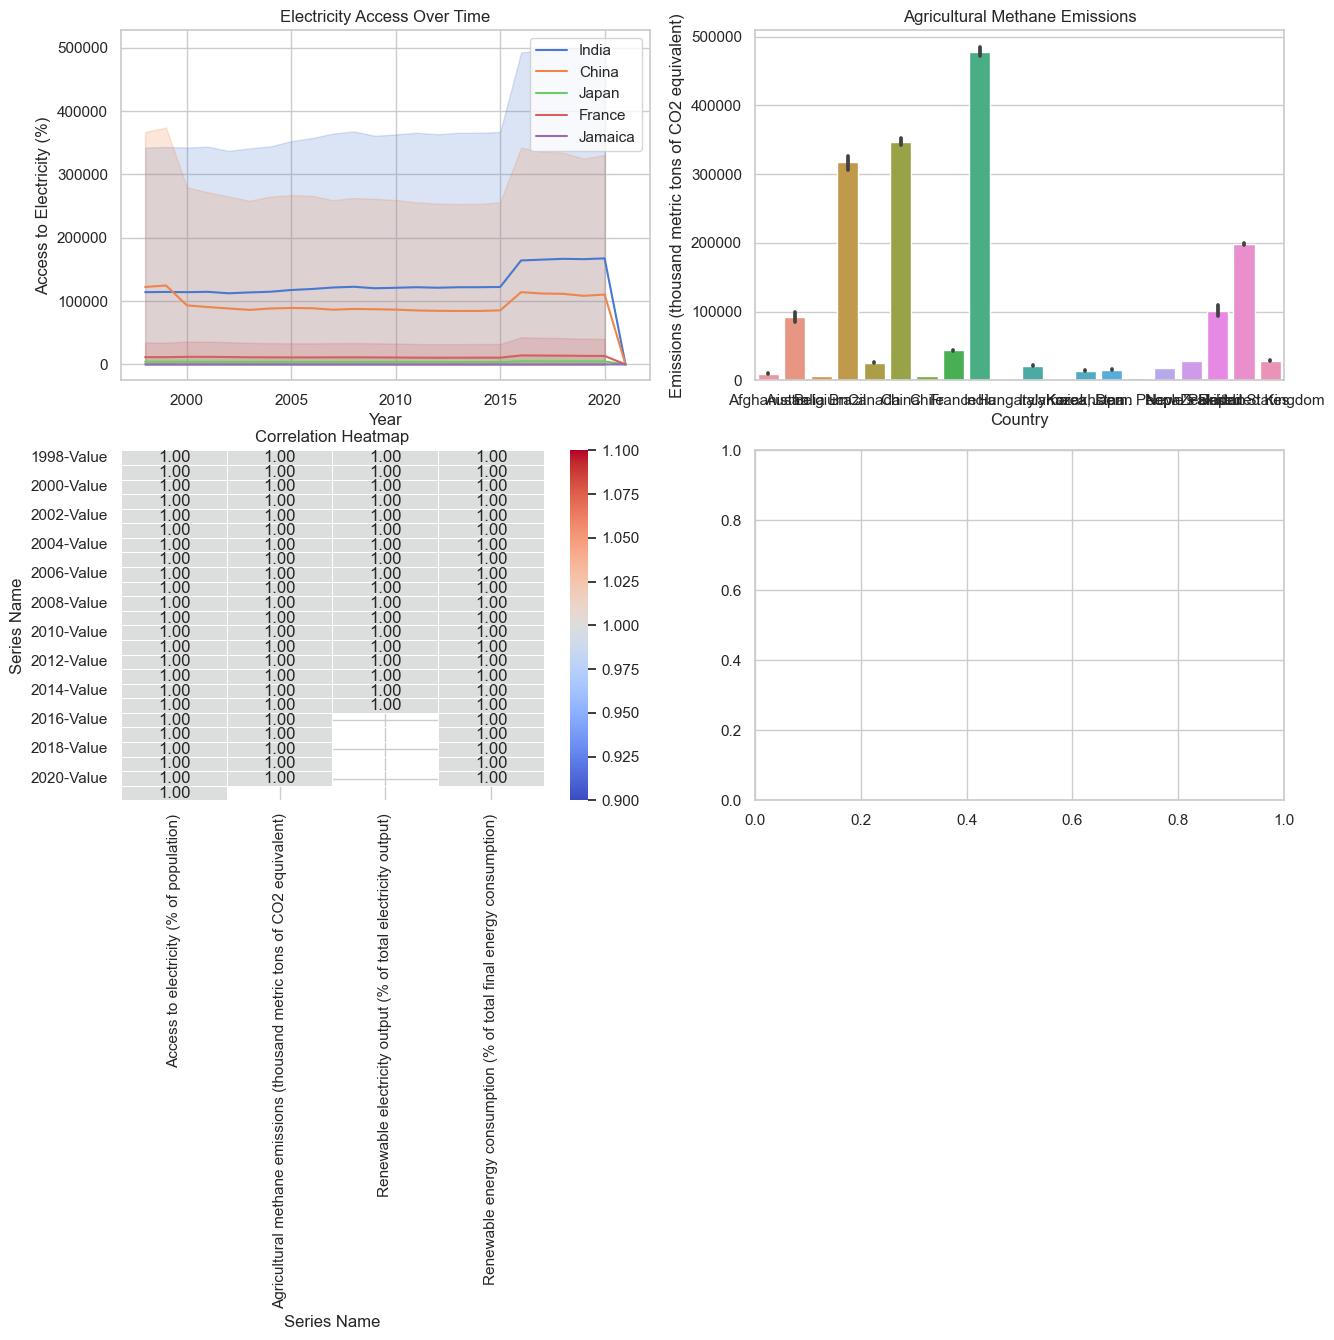

In [28]:
# Set a consistent style for all plots
sns.set(style="whitegrid", palette="muted")

# Subplot layout for better aesthetics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Line plot for selected countries
countries = ['India', 'China', 'Japan', 'France', 'Jamaica']
for country in countries:
    country_data = data_cleaned_melted[data_cleaned_melted['Country Name'] == country]
    sns.lineplot(x='Year', y='Value', data=country_data, label=country, ax=axes[0, 0])

axes[0, 0].set_title('Electricity Access Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Access to Electricity (%)')
axes[0, 0].legend()
# Bar plot for methane emissions
methane_data = data_cleaned_melted[data_cleaned_melted['Series Code'] == 'EN.ATM.METH.AG.KT.CE']
print("Methane Data:")
print(methane_data)  # Print the data for troubleshooting

sns.barplot(x='Country Name', y='Value', data=methane_data, ax=axes[0, 1])
axes[0, 1].set_title('Agricultural Methane Emissions')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Emissions (thousand metric tons of CO2 equivalent)')
# Heatmap for correlation matrix
# Replace pd.NA with NaN in 'Value' column
data_cleaned_melted['Value'] = data_cleaned_melted['Value'].replace(pd.NA, float('nan'))
correlation_matrix = data_cleaned_melted.pivot_table(index='Year', columns='Series Name', values='Value', aggfunc='corr')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')
axes[1, 0].set_xlabel('Series Name')
axes[1, 0].set_ylabel('Series Name')


# Print non-numeric values
non_numeric_values = data_cleaned_melted['Value'].loc[~pd.to_numeric(data_cleaned_melted['Value'], errors='coerce').notna()]
print("Non-numeric values:")
print(non_numeric_values)

# Set the desired color range (adjust min and max values as needed)
color_range = [0,80]

# Geospatial chart using plotly for all years with customized color range
fig = px.choropleth(data_cleaned_melted,
                    locations='Country Code',
                    color='Value',
                    hover_name='Country Name',
                    animation_frame='Year',  # Specify the column for timeline animation
                    color_continuous_scale='YlOrRd',
                    range_color=color_range,  # Set the color range
                    title='Geospatial Distribution Over Time')

fig.update_geos(projection_type="natural earth")
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()